## Preprocessing

In [66]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [67]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [68]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [69]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [70]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# OPTIMIZATION: Adding an addictional Application Type to the data: 'T9'
application_types_to_replace = ['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

In [71]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_val_count = application_df['CLASSIFICATION'].value_counts()
classification_val_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [72]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_sorted = classification_val_count[classification_val_count > 1]
classifications_sorted

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [73]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# OPTIMIZATION: Including an additional 'Classification': C1700 & C4000
other_classification = classification_val_count[classification_val_count < 150]
classifications_to_replace = other_classification.index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: count, dtype: int64

In [74]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [90]:
# Split our preprocessed data into our features and target arrays
y = application_dummies.IS_SUCCESSFUL.values
X = application_dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [91]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [92]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# OPTIMIZATION: Added significantly more units and additional layers.
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=47))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 200)               9600      
                                                                 
 dense_40 (Dense)            (None, 150)               30150     
                                                                 
 dense_41 (Dense)            (None, 150)               22650     
                                                                 
 dense_42 (Dense)            (None, 150)               22650     
                                                                 
 dense_43 (Dense)            (None, 100)               15100     
                                                                 
 dense_44 (Dense)            (None, 1)                 101       
                                                                 
Total params: 100251 (391.61 KB)
Trainable params: 100

In [93]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
# Train the model
# OPTIMIZATION: 30 additional epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
804/804 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.7236
Epoch 2/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5544 - accuracy: 0.7300
Epoch 3/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5523 - accuracy: 0.7326
Epoch 4/80
804/804 [==============================] - 3s 4ms/step - loss: 0.5493 - accuracy: 0.7331
Epoch 5/80
804/804 [==============================] - 3s 4ms/step - loss: 0.5483 - accuracy: 0.7336
Epoch 6/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7346
Epoch 7/80
804/804 [==============================] - 3s 3ms/step - loss: 0.5458 - accuracy: 0.7351
Epoch 8/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5453 - accuracy: 0.7354
Epoch 9/80
804/804 [==============================] - 3s 4ms/step - loss: 0.5445 - accuracy: 0.7358
Epoch 10/80
804/804 [==============================] - 3s 4ms/step - loss: 0.5437 - accuracy: 0.7358

In [95]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5870 - accuracy: 0.7251 - 541ms/epoch - 2ms/step
Loss: 0.5869823694229126, Accuracy: 0.7251312136650085


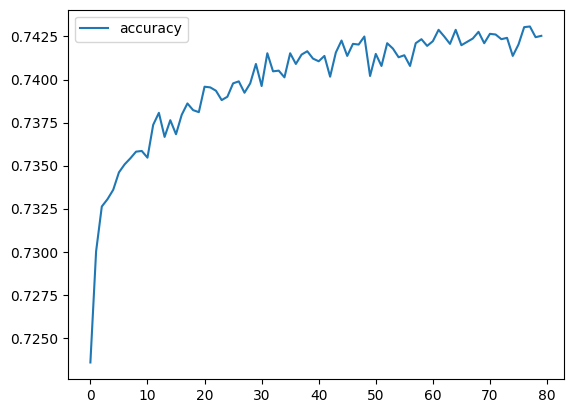

In [96]:
# For visuzlizing our results
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
